In [1]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import seaborn as sns

# Target Function

Lets create a target 1-D function with multiple local maxima to test and visualize how the [BayesianOptimization](https://github.com/fmfn/BayesianOptimization) package works. The target function we will try to maximize is the following:

$$f(x) = e^{-(x - 2)^2} + e^{-\frac{(x - 6)^2}{10}} + \frac{1}{x^2 + 1}, $$ its maximum is at $x = 2$ and we will restrict the interval of interest to $x \in (-2, 10)$.

In [2]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

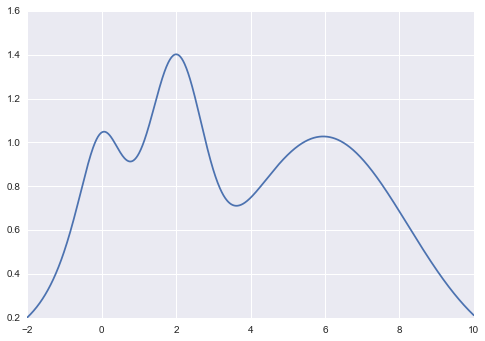

In [3]:
x = np.linspace(-2, 10, 1000)
y = target(x)

plt.plot(x, y)

# Create a BayesianOptimization Object

Enter the target function to be maximized, its variable(s) and their corresponding ranges (see this [example](https://github.com/fmfn/BayesianOptimization/blob/master/examples/usage.py) for a multi-variable case).

In [4]:
bo = BayesianOptimization(target, {'x': (-2, 10)})

In [5]:
# A minimum number of 2 initial guesses is necessary to kick start the algorithms, these can either
# be random or user defined.
bo.maximize(init_points=2, n_iter=0, acq='ucb', kappa=5)

Initializing function at point:  {'x': 2.8408303035354319} | result: 0.971976
Initializing function at point:  {'x': -1.5784617342854541} | result: 0.289613
Optimization finished with maximum: 0.971976, at position: {'x': 2.8408303035354319}.
Time taken: 0 minutes and 0.338852 seconds.


# Plotting and visualizing the algorithm at each step

### Lets first define a couple function to make plotting easier

In [6]:
def posterior(bo, xmin=-2, xmax=10):
    xmin, xmax = -2, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma2 = bo.gp.predict(np.linspace(xmin, xmax, 1000).reshape(-1, 1), eval_MSE=True)
    return mu, np.sqrt(sigma2)

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo)
    axis.plot(x, y, linewidth=3)
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x.reshape((-1, 1)), bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Current Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

### Two random points

After we probe two points at random, we can fit a Gaussian Process and start the bayesian optimization procedure. Two points should simply give us a roughly linear posterior with the uncertainty growing as we go further from the observations.

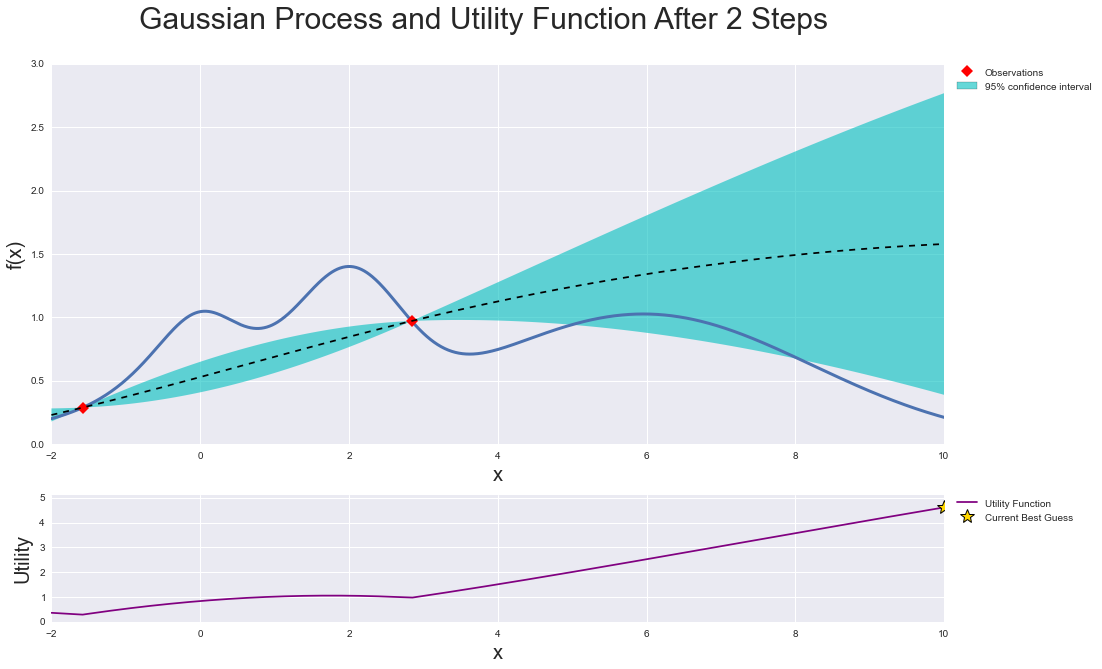

In [8]:
plot_gp(bo, x, y)

### After one step of GP (and two random points)

Iteration:   1 | Last sampled value:    0.211798 | with parameters:  {'x': 10.0}
               | Current maximum:       0.971976 | with parameters:  {'x': 2.8408303035354319}
               | Time taken: 0 minutes and 0.334935 seconds

Optimization finished with maximum: 0.971976, at position: {'x': 2.8408303035354319}.
Time taken: 0 minutes and 0.671701 seconds.


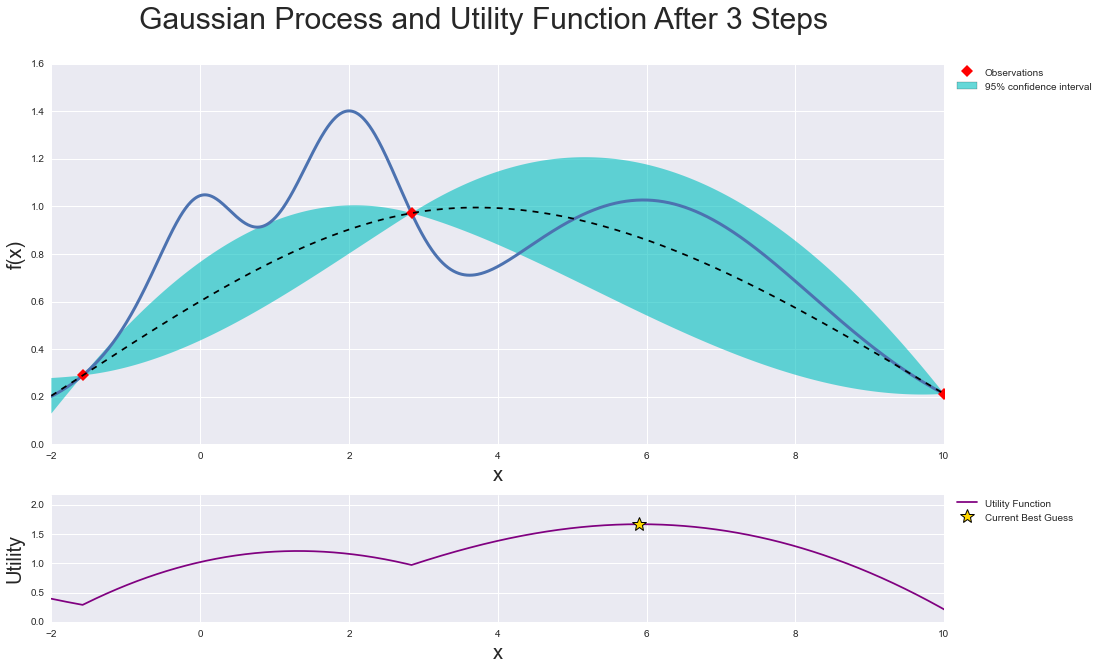

In [9]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

### After two steps of GP (and two random points)

Iteration:   1 | Last sampled value:    1.026978 | with parameters:  {'x': 5.9050554901303842}
               | Current maximum:       1.026978 | with parameters:  {'x': 5.9050554901303842}
               | Time taken: 0 minutes and 0.391282 seconds

Optimization finished with maximum: 1.026978, at position: {'x': 5.9050554901303842}.
Time taken: 0 minutes and 0.763052 seconds.


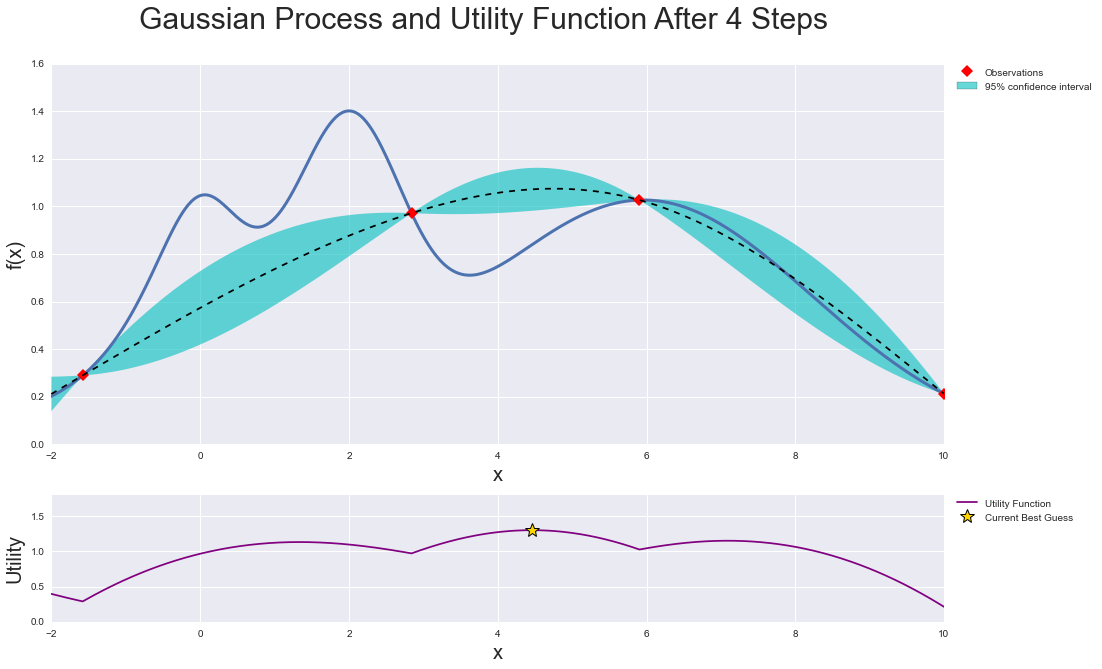

In [10]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

### After three steps of GP (and two random points)

Iteration:   1 | Last sampled value:    0.838827 | with parameters:  {'x': 4.4587753861998687}
               | Current maximum:       1.026978 | with parameters:  {'x': 5.9050554901303842}
               | Time taken: 0 minutes and 0.556636 seconds

Optimization finished with maximum: 1.026978, at position: {'x': 5.9050554901303842}.
Time taken: 0 minutes and 1.001991 seconds.


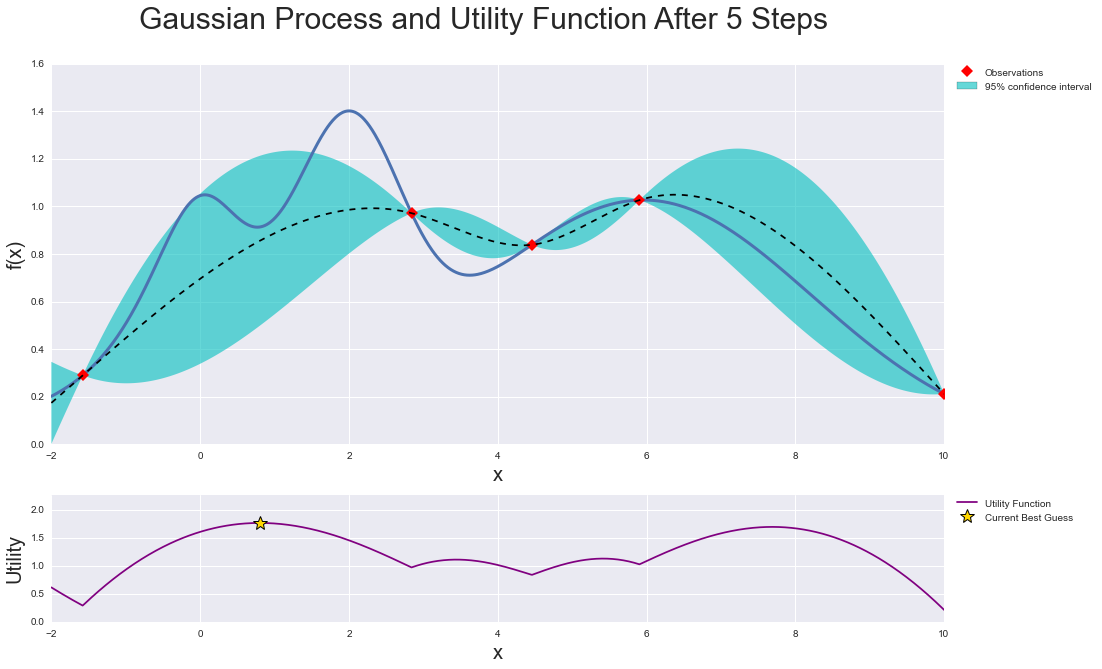

In [11]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

### After four steps of GP (and two random points)

Iteration:   1 | Last sampled value:    0.913613 | with parameters:  {'x': 0.79981012803154561}
               | Current maximum:       1.026978 | with parameters:  {'x': 5.9050554901303842}
               | Time taken: 0 minutes and 0.463993 seconds

Optimization finished with maximum: 1.026978, at position: {'x': 5.9050554901303842}.
Time taken: 0 minutes and 0.945405 seconds.


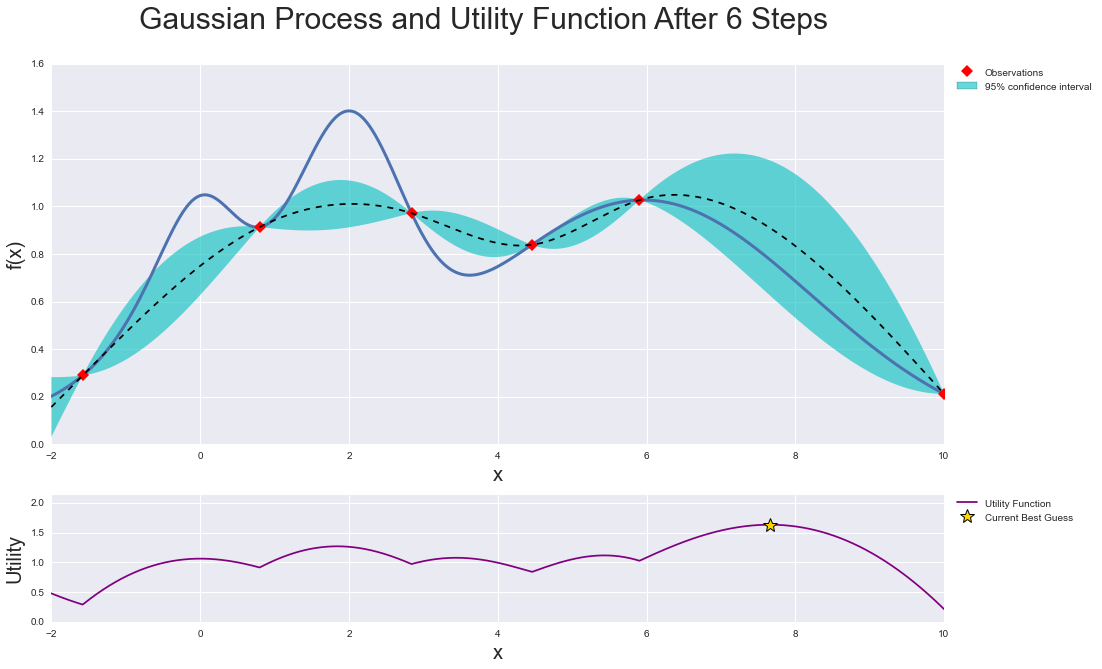

In [12]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

### After five steps of GP (and two random points)

Iteration:   1 | Last sampled value:    0.776904 | with parameters:  {'x': 7.6560961536619478}
               | Current maximum:       1.026978 | with parameters:  {'x': 5.9050554901303842}
               | Time taken: 0 minutes and 0.581157 seconds

Optimization finished with maximum: 1.026978, at position: {'x': 5.9050554901303842}.
Time taken: 0 minutes and 1.148893 seconds.


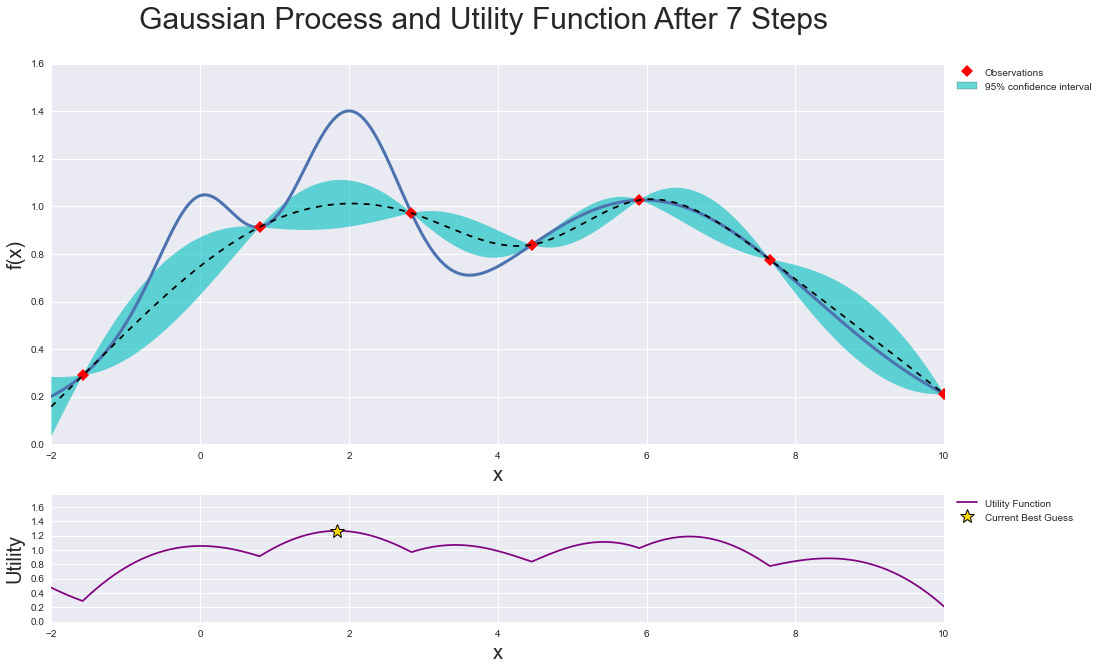

In [13]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

### After six steps of GP (and two random points)

Iteration:   1 | Last sampled value:    1.380825 | with parameters:  {'x': 1.8433767968010633}
               | Current maximum:       1.380825 | with parameters:  {'x': 1.8433767968010633}
               | Time taken: 0 minutes and 0.668414 seconds

Optimization finished with maximum: 1.380825, at position: {'x': 1.8433767968010633}.
Time taken: 0 minutes and 1.215754 seconds.


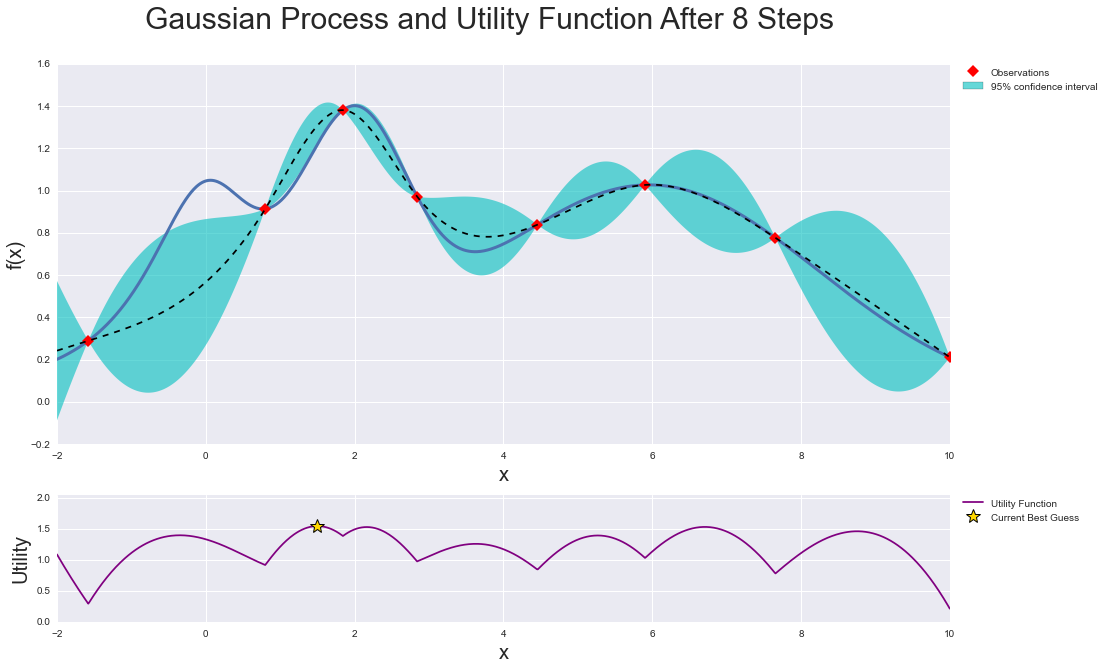

In [14]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

# Stopping

After just a few points the algorithm was able to get pretty close to the true maximum. It is important to notice the a trade off between exploration (probing points near the current known maximum) and exploitation (exploring the parameter space) is fundamental to a succesful bayesian optimization procedure. The utility function being used here (Upper Confidence Bound - UCB) has a free parameter $\kappa$ that allows the user to make the algorithm more or less conservative.

Additionally, a the larger the initial set of random points explored, the less likely the algorithm is to get stuck in local minima due to being too conservative.